In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r'C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Sentiment Analysis in Python\Al Baleed Resort by Anantara\AlBaleed Resort 1229 Reviews - Raw Data - Clean - Deleted unimportant columns.csv'

# Load the data
df = pd.read_csv(file_path)

def parse_ratings(ratings):
    # Initialize default ratings with None
    default_ratings = {'Value': None, 'Rooms': None, 'Location': None,
                       'Cleanliness': None, 'Service': None, 'Sleep Quality': None}
    if pd.isna(ratings):
        return pd.Series(default_ratings)
    # Split the ratings string into a dictionary
    ratings_dict = dict(x.split(': ') for x in ratings.split('\n'))
    # Create a series with default values overridden by the ratings_dict
    return pd.Series({**default_ratings, **ratings_dict})



# Apply the function to create new columns
new_columns = df['Additional Ratings'].apply(parse_ratings)
new_columns.rename(columns={'Location': 'Location_rating'}, inplace=True)

# Concatenate the new columns with the original dataframe and drop 'Additional Ratings'
df = pd.concat([df, new_columns], axis=1).drop(columns=['Additional Ratings'])

# Define the output file path
output_file_path = r'C:\Users\Ricardo S. Biason\OneDrive\Ric\DataCamp\Sentiment Analysis in Python\Al Baleed Resort by Anantara\AlBaleed Resort Cleaned Data.csv'

# Save the cleaned data to a new CSV file
df.to_csv(output_file_path, index=False)

print(df.head(10))


    1 User Location User Is Verified  Rating  \
0   2        London               No       5   
1   3         Paris               No       5   
2   4       Bangkok               No       5   
3   5           NaN               No       5   
4   6        Muscat               No       5   
5   7         Dubai               No       4   
6   8           NaN               No       5   
7   9  Saudi Arabia               No       5   
8  10           NaN               No       5   
9  11          Doha               No       5   

                             Review Title  \
0  Everything you can wish for in Salalah   
1                Three days in a paradise   
2              The best resort in salahla   
3                      Holiday april 2024   
4            Paradise within a Paradise!!   
5              Would definitely come back   
6                      Great Family hotel   
7                  Al Baleed is Wonderful   
8                Unforgettable experience   
9                 A m

In [54]:
# Print the total number of rows and columns in the DataFrame
print(f'Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}')

Total Rows: 1229, Total Columns: 18


In [55]:
# Summary table for specified columns
summary_columns = ['Value', 'Rooms', 'Location_rating', 'Cleanliness', 'Service', 'Sleep Quality']
summary_table = df[summary_columns].describe()

# Print the summary table
print(summary_table)

       Value Rooms Location_rating Cleanliness Service Sleep Quality
count    598   529             586         519     737           525
unique     5     5               4           4       5             5
top        5     5               5           5       5             5
freq     347   458             487         454     641           440


In [56]:
# Count the number of occurrences for each rating in the 'Value' column
value_counts = df['Value'].value_counts(dropna=False)  # Include NaN values if you want to count missing ratings too
value_percentages = df['Value'].value_counts(normalize=True, dropna=False) * 100  # Calculate percentages

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Counts': value_counts,
    'Percentage': value_percentages
})

# Print the summary DataFrame
print(summary_df)

      Counts  Percentage
None     631   51.342555
5        347   28.234337
4        188   15.296989
3         43    3.498779
2         12    0.976404
1          8    0.650936


In [57]:
# Count the number of occurrences for each rating in the 'Rooms' column
value_counts = df['Rooms'].value_counts(dropna=False)  # Include NaN values if you want to count missing ratings too
value_percentages = df['Rooms'].value_counts(normalize=True, dropna=False) * 100  # Calculate percentages

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Counts': value_counts,
    'Percentage': value_percentages
})

# Print the summary DataFrame
print(summary_df)

      Counts  Percentage
None     700   56.956876
5        458   37.266070
4         57    4.637917
3          7    0.569569
2          4    0.325468
1          3    0.244101


In [58]:
# Define the columns to analyze
columns_to_analyze = ['Value', 'Rooms', 'Location_rating', 'Cleanliness', 'Service', 'Sleep Quality']

# Initialize an empty DataFrame to store counts for each column
rating_counts = pd.DataFrame()

# Loop through each column, count occurrences of each rating, and add to the DataFrame
for column in columns_to_analyze:
    counts = df[column].value_counts(dropna=False)  # Count NaN values as 'None'
    counts.name = column  # Rename the Series to the name of the column
    rating_counts = pd.concat([rating_counts, counts], axis=1)

# Replace NaN with 'None' for missing data representation in counts
rating_counts.fillna('None', inplace=True)

# Print the summary DataFrame
print(rating_counts)

      Value  Rooms Location_rating Cleanliness  Service  Sleep Quality
None    631    700           643.0       710.0      492            704
5       347    458           487.0       454.0      641            440
4       188     57            85.0        59.0       70             67
3        43      7            11.0         5.0       16             12
2        12      4             3.0         1.0        6              5
1         8      3            None        None        4              1


C:\Users\Ricardo S. Biason\AppData\Local\Temp\ipykernel_1016\584713884.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append(pd.Series(df[column].isnull().sum(), index=['None']))  # Explicitly count and label NaNs as 'None'
C:\Users\Ricardo S. Biason\AppData\Local\Temp\ipykernel_1016\584713884.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append(pd.Series(df[column].isnull().sum(), index=['None']))  # Explicitly count and label NaNs as 'None'
C:\Users\Ricardo S. Biason\AppData\Local\Temp\ipykernel_1016\584713884.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append(pd.Series(df[column].isnull().sum(), index=['None']))  # Explicitly count and label NaNs as 'N

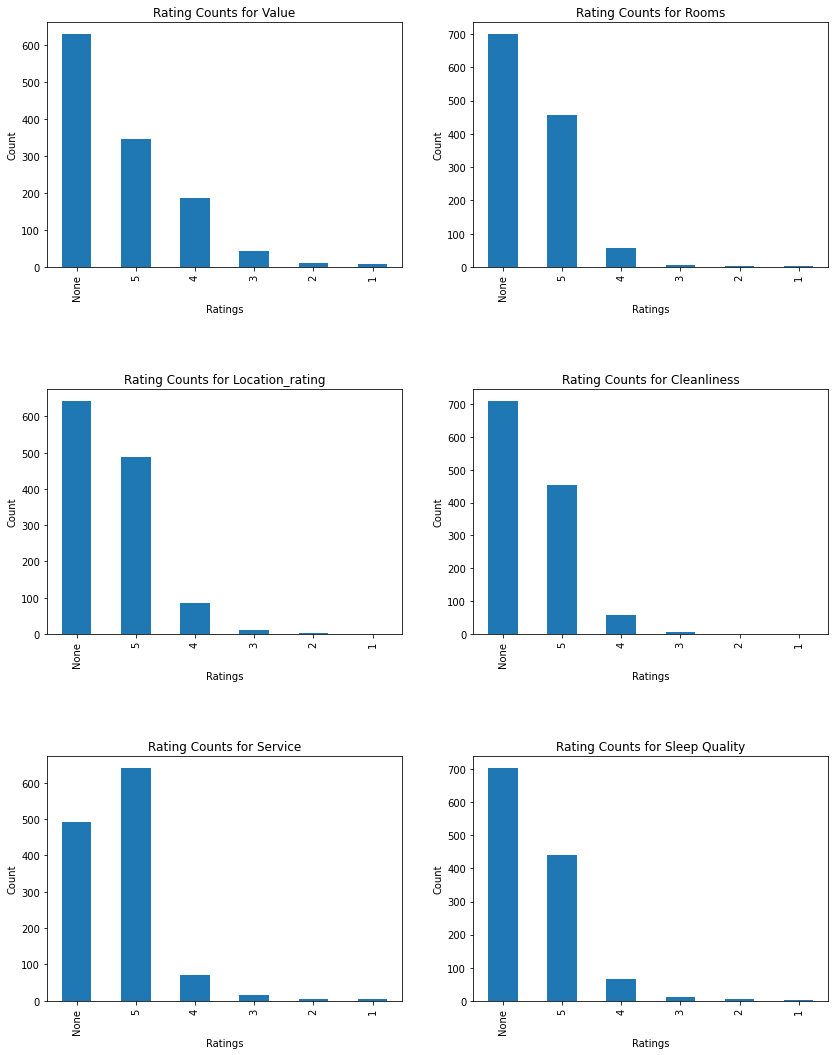

In [19]:
# Initialize an empty DataFrame to store counts for each column
rating_counts = pd.DataFrame()

import matplotlib.pyplot as plt

# Loop through each column, count occurrences of each rating, and add to the DataFrame
for column in columns_to_analyze:
    counts = df[column].value_counts(dropna=False)  # Count NaN values as 'None'
    counts = counts.append(pd.Series(df[column].isnull().sum(), index=['None']))  # Explicitly count and label NaNs as 'None'
    counts.name = column  # Rename the Series to the name of the column
    rating_counts = pd.concat([rating_counts, counts], axis=1)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))  # Adjust subplot layout
fig.subplots_adjust(hspace=0.5)  # Adjust horizontal space between plots

# Loop through each subplot and column to plot
for ax, column in zip(axes.flatten(), columns_to_analyze):
    rating_counts[column].drop('None').plot(kind='bar', ax=ax)  # Exclude 'None' for visual clarity if desired
    ax.set_title(f'Rating Counts for {column}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Count')

plt.show()

In [59]:
# Count the number of 5's, 1's, 2's, and 3's in the 'Rating' column
rating_fives = df[df['Rating'] == 5].shape[0]
rating_fours = df[df['Rating'] == 4].shape[0]
rating_ones = df[df['Rating'] == 1].shape[0]
rating_twos = df[df['Rating'] == 2].shape[0]
rating_threes = df[df['Rating'] == 3].shape[0]

# Print the results
print(f"Number of 5's in the Rating column: {rating_fives}")
print(f"Number of 4's in the Rating column: {rating_fours}")
print(f"Number of 1's in the Rating column: {rating_ones}")
print(f"Number of 2's in the Rating column: {rating_twos}")
print(f"Number of 3's in the Rating column: {rating_threes}")


Number of 5's in the Rating column: 1083
Number of 4's in the Rating column: 109
Number of 1's in the Rating column: 7
Number of 2's in the Rating column: 10
Number of 3's in the Rating column: 20


In [60]:
# Count the number of 4's and 5's in the 'Rating' column and sum them
ratings_high = df[df['Rating'].isin([4, 5])].shape[0]

# Count the number of 1's, 2's, and 3's in the 'Rating' column and sum them
ratings_low = df[df['Rating'].isin([1, 2, 3])].shape[0]

# Print the results
print(f"Combined number of 4's and 5's in the Rating column: {ratings_high}")
print(f"Combined number of 1's, 2's, and 3's in the Rating column: {ratings_low}")

Combined number of 4's and 5's in the Rating column: 1192
Combined number of 1's, 2's, and 3's in the Rating column: 37


In [61]:
# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts()

# Calculate the total number of entries to determine proportions
total_reviews = len(df)

# Calculate the proportion of ratings 4 and 5 combined
prop_high_ratings = (rating_counts.get(4, 0) + rating_counts.get(5, 0)) / total_reviews

# Calculate the combined proportion of ratings 1, 2, and 3
prop_low_ratings = (rating_counts.get(1, 0) + rating_counts.get(2, 0) + rating_counts.get(3, 0)) / total_reviews

# Print the results
print(f"Proportion of positive reviews (Ratings of 4 and 5): {prop_high_ratings:.2f}")
print(f"Proportion of negative reviews (Ratings of 1, 2, and 3): {prop_low_ratings:.2f}")


Proportion of positive reviews (Ratings of 4 and 5): 0.97
Proportion of negative reviews (Ratings of 1, 2, and 3): 0.03


In [62]:
# Now, we'll classify longest and shortest reviews
length_reviews = df['Review Text'].str.len()

# How long is the longest review
print(max(length_reviews))


5610


In [63]:
length_reviews = df['Review Text'].str.len()

# How long is the shortest review
print(min(length_reviews))

122


In [66]:
# Retrieve the longest review text using the index
longest_review = df.loc[max_length_index, 'Review Text']

# Print the longest review
print("Longest Review:")
print(longest_review)

Longest Review:
We have just returned from a 9 night stay in a Lagoon Pool Villa.   I can't rate this hotel highly enough.   
From the moment my family (2 adults, 7 and 4 yr old boys and 6 month old baby) arrived 'til literally the send off from reception staff, as we departed, we felt we were staying somewhere very special.   

First off, you have to fly to Salalah which basically means flying Oman Air.   This seems something of a roll of the dice as apparently 40% of bags go missing or are delayed.   One of our bags was delayed by two days.  However, the hotel stepped up and kept phoning to chase up where it was and went and collected it for us.    So, the extra flight is a hassle but that absolutely shouldn't put you off visiting.
Our room was spacious, modern & exceptionally clean.  The pool was wonderful as was the spacious outdoor seating.   The bathroom shower opened out into the pool and there was another way out from the living room.  All in all an extremely well planned layou

In [67]:
from textblob import TextBlob

# Retrieve the longest review text using the index
longest_review = df.loc[max_length_index, 'Review Text']

# Perform sentiment analysis on the longest review
blob = TextBlob(longest_review)
sentiment = blob.sentiment

# Print the sentiment of the longest review
print("Sentiment of the longest review:", sentiment)


Sentiment of the longest review: Sentiment(polarity=0.23810171038112207, subjectivity=0.4974262611027317)


Slightly Positive Sentiment
The sentiment analysis indicates that the review generally has a positive tone. This means that the reviewer likely expressed positive feelings or opinions about the Al Baleed Resort Salalah by Anantara.

Moderate Subjectivity: The analysis also suggests that the review contains some subjective elements. This means that the reviewer's personal opinions or experiences are reflected in the review. While the review may contain factual information about the resort, it also includes the reviewer's personal perspective or feelings.

In summary, the sentiment analysis indicates that the review of the Al Baleed Resort Salalah by Anantara is generally positive, but it also includes some subjective viewpoints from the reviewer.


The sentiment analysis result for the longest review indicates the following:

Polarity of 0.238
The polarity score measures the sentiment of the text on a scale from -1 to 1, where negative values indicate negative sentiment, positive values indicate positive sentiment, and 0 indicates neutral sentiment. In this case, the polarity score of 0.238 suggests a slightly positive sentiment.

Subjectivity of 0.497
The subjectivity score measures the subjectiveness of the text on a scale from 0 to 1, where 0 is very objective and 1 is very subjective. A subjectivity score of 0.497 indicates that the text is somewhat subjective, meaning it likely contains personal opinions or feelings.

Overall, the sentiment analysis suggests that the review of the Al Baleed Resort Salalah by Anantara has a slightly positive sentiment with a moderate degree of subjectivity. Subjectivity is based on, or influenced by, personal feelings, tastes, or opinions. A subjective perspective can also be called a personal perspective or an individual point of view. 

In [69]:
# Retrieve the shortest review text using the index
shortest_review = df.loc[min_length_index, 'Review Text']

# Print the shortest review
print("Shortest Review:")
print(shortest_review)


Shortest Review:
Amazing nature, special place with best service you can imagine and chill, relaxed vibe. Best 5 Star hotel in Oman by far.


In [70]:
from textblob import TextBlob

# Retrieve the shortest review text using the index
shortest_review = df.loc[min_length_index, 'Review Text']

# Perform sentiment analysis on the longest review
blob = TextBlob(shortest_review)
sentiment = blob.sentiment

# Print the sentiment of the shortest review
print("Sentiment of the shortest review:", sentiment)

Sentiment of the shortest review: Sentiment(polarity=0.6114285714285714, subjectivity=0.6142857142857143)


The sentiment analysis result for the shortest review indicates the following:

Polarity: 0.611
The polarity score of 0.611 suggests a strongly positive sentiment.

Subjectivity: 0.614
A subjectivity score of 0.614 indicates that the text is quite subjective, meaning it likely contains personal opinions or feelings.

Overall, the sentiment analysis suggests that the shortest review of the Al Baleed Resort Salalah by Anantara has a strongly positive sentiment with a high degree of subjectivity.

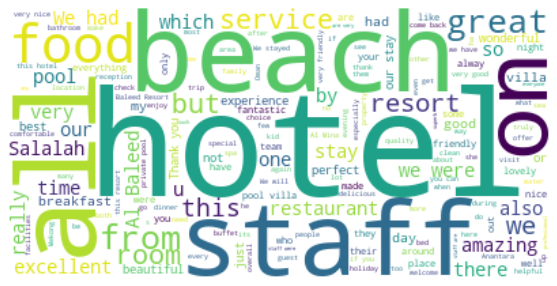

In [71]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews where the rating is exactly 4 or 5
high_rating_reviews = df[df['Rating'].isin([4, 5])]

# Concatenate the reviews into a single string
concatenated_reviews = " ".join(high_rating_reviews['Review Text'].dropna().tolist())

# Specify stopwords (common words that may not add much value to the word cloud)
my_stopwords = set(["the", "a", "an", "and", "of", "in", "to", "it", "I", "is", "with", "that", "was", "as", "for", "br", "at"])

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(concatenated_reviews)

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The word cloud visually represents the frequency and prominence of specific terms found in customer reviews for the Al Baleed Resort by Anantara. The following are key insights and strategic implications for marketing.

Customer Experience Focus
The prominence of words like "beach," "service," "food," "staff," and "resort" suggest that these are highly valued aspects of the customer experience at this location. Emphasizing these elements in marketing materials can reinforce what customers appreciate most about their stay.

Key Attributes
The large size of "beach" and "service" indicates these are standout features that could be highlighted in advertising campaigns. These elements are likely contributing significantly to customer satisfaction and could be used as central themes in promotional strategies.

Potential Areas for Improvement
The presence of neutral words such as "just," "also," and "really" might suggest that while many reviews are positive, there might be an undertone of expectations not fully met or merely met without exceeding expectations. This could be an area for operational improvements or for recalibrating customer expectations through more detailed information in marketing.

Leveraging Testimonials
Utilizing quotes from reviews prominently featuring these words in marketing collateral can create a genuine and relatable advertisement strategy. Potential customers are often persuaded by the testimonials of past guests, especially when they highlight exemplary service or unique features like the beach.

SEO and Online Visibility
These keywords can be strategically used in online content to improve SEO (Search Engine Optimization) and align with the terms potential guests are searching for. This alignment can drive more organic traffic to the resort’s website or platforms.

Cultural and Contextual Relevance
The specific mention of "Al Baleed," "Salalah," and other location-specific terms indicates a strong place-based identity that can be leveraged to attract tourists looking for destination-specific experiences.

In summary, the analysis of this word cloud not only helps in understanding what current customers value but also provides data-driven insights that can guide future marketing strategies to enhance customer satisfaction and business growth.